In [231]:
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
import os
from datetime import datetime
import joblib
import gradio as gr

In [54]:
os.getcwd()

'C:\\Users\\DELL\\Desktop\\TECHTERN 01\\Flood Prediction'

In [3]:
#creating an artifile for the project
def projectAtifile(maindr, projectName, foldix):
    folders = ['data', 'notebooks', 'visualisation', 'transforms', 'resources']
    os.chdir(maindr)
    os.makedirs(projectName)
    newDir = os.getcwd() + '/' + projectName
    os.chdir(newDir)
    
    for indx in foldix:
        os.makedirs(folders[indx])

In [17]:
projectName = 'Flood Prediction'
path = 'C:\\Users\\User\\Desktop\\TECHTERN 01'
foldinx = [0,1,2,3,4]


projectAtifile(path, projectName, foldinx)

In [56]:
#checking the current directory
os.getcwd()

'C:\\Users\\DELL\\Desktop\\TECHTERN 01\\Flood Prediction'

In [481]:
#changing directory to the artifile folder
os.chdir(r'C:\\Users\\DELL\\Desktop\\TECHTERN 01\\Flood Prediction')

In [483]:
#importing the data for Analysis
data = pd.read_csv('data/FloodPrediction.csv', index_col = 0)

In [485]:
data

,Station_Names,Year,Month,Max_Temp,Min_Temp,Rainfall,Relative_Humidity,Wind_Speed,Cloud_Coverage,Bright_Sunshine,Station_Number,X_COR,Y_COR,LATITUDE,LONGITUDE,ALT,Period,Flood?
Sl,,,,,,,,,,,,,,,,,,
0,Barisal,1949,1,29.4,12.3,0.0,68.0,0.453704,0.6,7.831915,41950,536809.8,510151.9,22.70,90.36,4,1949.01,NaN
1,Barisal,1949,2,33.9,15.2,9.0,63.0,0.659259,0.9,8.314894,41950,536809.8,510151.9,22.70,90.36,4,1949.02,NaN
2,Barisal,1949,3,36.7,20.2,8.0,59.0,1.085185,1.5,8.131915,41950,536809.8,510151.9,22.70,90.36,4,1949.03,NaN
3,Barisal,1949,4,33.9,23.9,140.0,71.0,1.772222,3.9,8.219149,41950,536809.8,510151.9,22.70,90.36,4,1949.04,NaN
4,Barisal,1949,5,35.6,25.0,217.0,76.0,1.703704,4.1,7.046809,41950,536809.8,510151.9,22.70,90.36,4,1949.05,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20539,Teknaf,2013,8,32.5,25.4,851.0,88.0,2.500000,6.2,3.800000,41998,734765.4,308914.1,20.87,92.26,4,2013.08,1.0
20540,Teknaf,2013,9,32.6,25.7,329.0,88.0,3.000000,6.1,4.200000,41998,734765.4,308914.1,20.87,92.26,4,2013.09,NaN
20541,Teknaf,2013,10,33.1,24.8,271.0,85.0,2.500000,4.4,5.600000,41998,734765.4,308914.1,20.87,92.26,4,2013.10,NaN


In [487]:
#checking for the to 10 head
data.head(10)

,Station_Names,Year,Month,Max_Temp,Min_Temp,Rainfall,Relative_Humidity,Wind_Speed,Cloud_Coverage,Bright_Sunshine,Station_Number,X_COR,Y_COR,LATITUDE,LONGITUDE,ALT,Period,Flood?
Sl,,,,,,,,,,,,,,,,,,
0,Barisal,1949,1,29.4,12.3,0.0,68.0,0.453704,0.6,7.831915,41950,536809.8,510151.9,22.7,90.36,4,1949.01,NaN
1,Barisal,1949,2,33.9,15.2,9.0,63.0,0.659259,0.9,8.314894,41950,536809.8,510151.9,22.7,90.36,4,1949.02,NaN
2,Barisal,1949,3,36.7,20.2,8.0,59.0,1.085185,1.5,8.131915,41950,536809.8,510151.9,22.7,90.36,4,1949.03,NaN
3,Barisal,1949,4,33.9,23.9,140.0,71.0,1.772222,3.9,8.219149,41950,536809.8,510151.9,22.7,90.36,4,1949.04,NaN
4,Barisal,1949,5,35.6,25.0,217.0,76.0,1.703704,4.1,7.046809,41950,536809.8,510151.9,22.7,90.36,4,1949.05,NaN
5,Barisal,1949,6,34.4,25.7,512.0,80.0,1.631481,5.6,4.072340,41950,536809.8,510151.9,22.7,90.36,4,1949.06,1.0
6,Barisal,1949,7,33.4,25.8,575.0,85.0,1.570370,5.4,3.738298,41950,536809.8,510151.9,22.7,90.36,4,1949.07,1.0
7,Barisal,1949,8,33.5,25.7,349.0,86.0,1.329630,5.6,4.272340,41950,536809.8,510151.9,22.7,90.36,4,1949.08,1.0
8,Barisal,1949,9,34.8,25.7,252.0,83.0,0.937037,4.8,4.823404,41950,536809.8,510151.9,22.7,90.36,4,1949.09,NaN


In [489]:
#checking for the 10 row tail of the data
data.tail(10)

,Station_Names,Year,Month,Max_Temp,Min_Temp,Rainfall,Relative_Humidity,Wind_Speed,Cloud_Coverage,Bright_Sunshine,Station_Number,X_COR,Y_COR,LATITUDE,LONGITUDE,ALT,Period,Flood?
Sl,,,,,,,,,,,,,,,,,,
20534,Teknaf,2013,3,34.1,20.6,0.0,75.0,4.1,0.7,9.5,41998,734765.4,308914.1,20.87,92.26,4,2013.03,NaN
20535,Teknaf,2013,4,33.1,24.2,34.0,77.0,4.4,1.7,9.1,41998,734765.4,308914.1,20.87,92.26,4,2013.04,NaN
20536,Teknaf,2013,5,34.2,24.8,753.0,85.0,3.7,5.5,3.9,41998,734765.4,308914.1,20.87,92.26,4,2013.05,1.0
20537,Teknaf,2013,6,33.2,25.8,821.0,87.0,3.5,6.2,4.6,41998,734765.4,308914.1,20.87,92.26,4,2013.06,1.0
20538,Teknaf,2013,7,32.2,25.3,1127.0,89.0,3.3,6.5,3.6,41998,734765.4,308914.1,20.87,92.26,4,2013.07,1.0
20539,Teknaf,2013,8,32.5,25.4,851.0,88.0,2.5,6.2,3.8,41998,734765.4,308914.1,20.87,92.26,4,2013.08,1.0
20540,Teknaf,2013,9,32.6,25.7,329.0,88.0,3.0,6.1,4.2,41998,734765.4,308914.1,20.87,92.26,4,2013.09,NaN
20541,Teknaf,2013,10,33.1,24.8,271.0,85.0,2.5,4.4,5.6,41998,734765.4,308914.1,20.87,92.26,4,2013.10,NaN
20542,Teknaf,2013,11,32.5,20.0,0.0,79.0,2.1,1.7,8.4,41998,734765.4,308914.1,20.87,92.26,4,2013.11,NaN


In [491]:
#Taking Sample of the data
data.sample(100)

,Station_Names,Year,Month,Max_Temp,Min_Temp,Rainfall,Relative_Humidity,Wind_Speed,Cloud_Coverage,Bright_Sunshine,Station_Number,X_COR,Y_COR,LATITUDE,LONGITUDE,ALT,Period,Flood?
Sl,,,,,,,,,,,,,,,,,,
18281,Sitakunda,2013,6,35.900000,25.900000,569.000000,86.000000,1.600000,4.70000,6.200000,41965,668856.2,504500.3,22.64,91.64,4,2013.06,1.0
1356,Bogra,1948,1,25.800000,11.700000,8.140625,74.218750,0.875926,1.10000,7.296226,41883,435303.7,751187.5,24.88,89.36,20,1948.01,NaN
19514,Sylhet,1992,3,33.500000,18.700000,183.000000,74.000000,1.300000,4.20000,6.200000,41891,694533.2,752277.9,24.88,91.93,35,1992.03,NaN
10986,Khulna,1992,7,35.400000,25.100000,254.000000,88.000000,2.000000,6.00000,3.000000,41947,456632.4,521635.7,22.80,89.58,4,1992.07,NaN
3245,Chittagong (IAP-Patenga),1986,6,37.000000,25.800000,820.000000,83.000000,5.900000,5.80000,4.900000,41978,684570.9,471415.0,22.34,91.79,6,1986.06,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10324,Khepupara,2003,5,34.800000,26.300000,165.000000,81.000000,2.000000,4.50000,7.600000,41984,522893.1,430006.8,21.98,90.22,3,2003.05,NaN
18054,Sitakunda,1994,7,32.800000,25.600000,316.000000,85.000000,1.100000,5.90000,3.800000,41965,668856.2,504500.3,22.64,91.64,4,1994.07,NaN
16926,Sandwip,2003,7,32.682979,25.385106,866.808511,89.826087,2.482979,5.91087,4.100000,41964,650012.1,488627.9,22.50,91.46,6,2003.07,1.0


In [493]:
#outcome variable data 
data['Flood?'].value_counts()

Flood?
1.0    4132
0.0     361
Name: count, dtype: int64

In [495]:
#checking the size of the data
data.size

369792

In [497]:
#exploring the shape of the data
data.shape

(20544, 18)

In [499]:
#exploring informations about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20544 entries, 0 to 20543
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Station_Names      20544 non-null  object 
 1   Year               20544 non-null  int64  
 2   Month              20544 non-null  int64  
 3   Max_Temp           20544 non-null  float64
 4   Min_Temp           20544 non-null  float64
 5   Rainfall           20544 non-null  float64
 6   Relative_Humidity  20544 non-null  float64
 7   Wind_Speed         20544 non-null  float64
 8   Cloud_Coverage     20544 non-null  float64
 9   Bright_Sunshine    20544 non-null  float64
 10  Station_Number     20544 non-null  int64  
 11  X_COR              20544 non-null  float64
 12  Y_COR              20544 non-null  float64
 13  LATITUDE           20544 non-null  float64
 14  LONGITUDE          20544 non-null  float64
 15  ALT                20544 non-null  int64  
 16  Period             20544 no

In [502]:
#EXPLORING THE STATISTICAL MEASURES OF THE DATA
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,20544.0,1985.332944,17.610799,1948.00,1972.000000,1987.00,2000.0000,2013.00
Month,20544.0,6.500000,3.452137,1.00,3.750000,6.50,9.2500,12.00
Max_Temp,20544.0,33.450739,2.956401,21.60,31.700000,33.90,35.4000,44.00
Min_Temp,20544.0,21.166872,4.949587,6.20,16.900000,23.40,25.4000,28.10
Rainfall,20544.0,198.776621,240.693197,0.00,8.000000,111.00,312.0000,2072.00
Relative_Humidity,20544.0,79.497375,7.667925,34.00,75.000000,81.00,85.0000,97.00
Wind_Speed,20544.0,1.415049,1.042454,0.00,0.700000,1.20,1.9000,11.20
Cloud_Coverage,20544.0,3.485827,2.083791,0.00,1.600000,3.30,5.5000,7.90
Bright_Sunshine,20544.0,6.419056,1.747959,0.00,4.965517,6.80,7.8000,11.00
Station_Number,20544.0,41935.098131,36.516932,41859.00,41909.000000,41941.00,41963.0000,41998.00


In [504]:
data.isna().sum()

Station_Names            0
Year                     0
Month                    0
Max_Temp                 0
Min_Temp                 0
Rainfall                 0
Relative_Humidity        0
Wind_Speed               0
Cloud_Coverage           0
Bright_Sunshine          0
Station_Number           0
X_COR                    0
Y_COR                    0
LATITUDE                 0
LONGITUDE                0
ALT                      0
Period                   0
Flood?               16051
dtype: int64

In [506]:
dups = data[data.duplicated()]
dups

,Station_Names,Year,Month,Max_Temp,Min_Temp,Rainfall,Relative_Humidity,Wind_Speed,Cloud_Coverage,Bright_Sunshine,Station_Number,X_COR,Y_COR,LATITUDE,LONGITUDE,ALT,Period,Flood?
Sl,,,,,,,,,,,,,,,,,,


In [508]:
def Oulierdetect(data):
    
    plt.figure (figsize=(20,20))
    data.plot(kind = 'box', subplots= True, layout = (4,8), sharey = False, sharex = False)
    plt.gcf().set_size_inches(15,20)
    plt.suptitle('Outliers of folld data')
    Filename = 'Outliers'
    path = r"C:\Users\DELL\Desktop\TECHTERN 01\Flood Prediction\visualisation"
    plt.savefig(path + '/' + '.png')
    plt.show()

<Figure size 2000x2000 with 0 Axes>

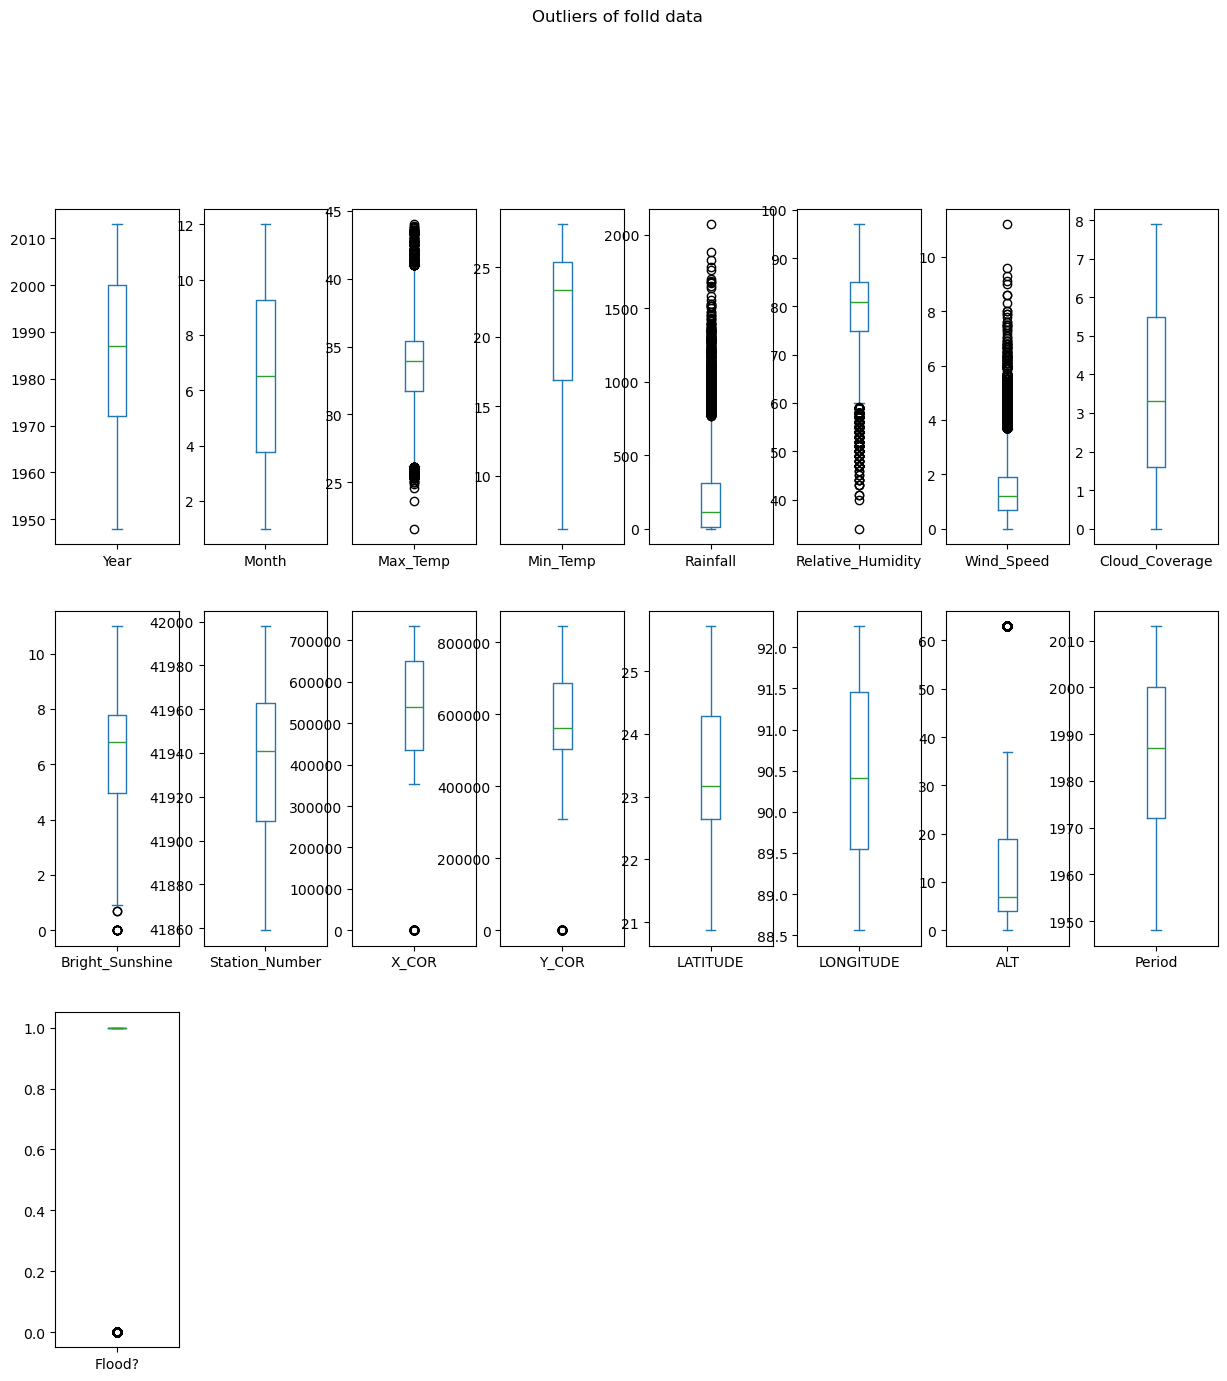

In [510]:
Oulierdetect(data)

In [1]:
def visualize_categorical_and_numeric(data, path):
    # Identify categorical and numeric columns
    cat_columns = data.select_dtypes(include=['object']).columns  # Categorical columns
    num_columns = data.select_dtypes(include=['number']).columns  # Numeric columns
    
    # Visualize categorical variables using countplots
    for column in cat_columns:
        plt.figure(figsize=(8, 6))
        sn.countplot(x=column, hue = 'Occupancy', data=data, order=data[column].value_counts().index)
        plt.title(f"Countplot of {column}")
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        # Save the plot
        save_path = f"{path}/countplot_{column}.png"
        plt.savefig(save_path, dpi=300)
        plt.show()

In [19]:
'''def oulier_limit(data):
    q3,q1 = np.percentile(col, [75,25])
    iqr = q3-q1
    
    lower_limit = q1-1.5*iqr
    upper_limit = q3+q1*iqr
    
    return lower_limit,upper_limit'''

'def oulier_limit(data):\n    q3,q1 = np.percentile(col, [75,25])\n    iqr = q3-q1\n    \n    lower_limit = q1-1.5*iqr\n    upper_limit = q3+q1*iqr\n    \n    return lower_limit,upper_limit'

In [20]:
'''for col in continues:
    
    print('................................................')
    print('column', col)
    UL,LL = oulier_limit(data[col])
          
    total_outliers = len(data.loc[data[col]>UL,col]) + len(data.loc[data[col]<LL,col])
    print('lower_limit....................................',LL)
    print('upper_limit....................................',UL)
    percentage = (total_outliers/len(data.index))*100
    print('percentage.......................................',percentage)
    print('..................................................')'''

"for col in continues:\n    \n    print('................................................')\n    print('column', col)\n    UL,LL = oulier_limit(data[col])\n          \n    total_outliers = len(data.loc[data[col]>UL,col]) + len(data.loc[data[col]<LL,col])\n    print('lower_limit....................................',LL)\n    print('upper_limit....................................',UL)\n    percentage = (total_outliers/len(data.index))*100\n    print('percentage.......................................',percentage)\n    print('..................................................')"

In [21]:
'''for col in list(continues):
    UL,LL = oulier_limit(data[col])
    data.loc[data[col]>UL, col] = np.nan
    data.loc[data[col]<LL,col] = np.nan
    data.dropna(subset = 'Max_Temp','Rainfall', 'Relative_Humidity', 'Wind_Speed', inplace = True)
    data.reset_index(drop = True, inplace = True)'''

"for col in list(continues):\n    UL,LL = oulier_limit(data[col])\n    data.loc[data[col]>UL, col] = np.nan\n    data.loc[data[col]<LL,col] = np.nan\n    data.dropna(subset = 'Max_Temp','Rainfall', 'Relative_Humidity', 'Wind_Speed', inplace = True)\n    data.reset_index(drop = True, inplace = True)"

In [512]:
data

,Station_Names,Year,Month,Max_Temp,Min_Temp,Rainfall,Relative_Humidity,Wind_Speed,Cloud_Coverage,Bright_Sunshine,Station_Number,X_COR,Y_COR,LATITUDE,LONGITUDE,ALT,Period,Flood?
Sl,,,,,,,,,,,,,,,,,,
0,Barisal,1949,1,29.4,12.3,0.0,68.0,0.453704,0.6,7.831915,41950,536809.8,510151.9,22.70,90.36,4,1949.01,NaN
1,Barisal,1949,2,33.9,15.2,9.0,63.0,0.659259,0.9,8.314894,41950,536809.8,510151.9,22.70,90.36,4,1949.02,NaN
2,Barisal,1949,3,36.7,20.2,8.0,59.0,1.085185,1.5,8.131915,41950,536809.8,510151.9,22.70,90.36,4,1949.03,NaN
3,Barisal,1949,4,33.9,23.9,140.0,71.0,1.772222,3.9,8.219149,41950,536809.8,510151.9,22.70,90.36,4,1949.04,NaN
4,Barisal,1949,5,35.6,25.0,217.0,76.0,1.703704,4.1,7.046809,41950,536809.8,510151.9,22.70,90.36,4,1949.05,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20539,Teknaf,2013,8,32.5,25.4,851.0,88.0,2.500000,6.2,3.800000,41998,734765.4,308914.1,20.87,92.26,4,2013.08,1.0
20540,Teknaf,2013,9,32.6,25.7,329.0,88.0,3.000000,6.1,4.200000,41998,734765.4,308914.1,20.87,92.26,4,2013.09,NaN
20541,Teknaf,2013,10,33.1,24.8,271.0,85.0,2.500000,4.4,5.600000,41998,734765.4,308914.1,20.87,92.26,4,2013.10,NaN


In [514]:
data['Station_Names'].unique()

array(['Barisal', 'Bhola', 'Bogra', 'Chandpur',
       'Chittagong (City-Ambagan)', 'Chittagong (IAP-Patenga)', 'Comilla',
       "Cox's Bazar", 'Dhaka', 'Dinajpur', 'Faridpur', 'Feni', 'Hatiya',
       'Ishurdi', 'Jessore', 'Khepupara', 'Khulna', 'Kutubdia',
       'Madaripur', 'Maijdee Court', 'Mongla', 'Mymensingh', 'Patuakhali',
       'Rajshahi', 'Rangamati', 'Rangpur', 'Sandwip', 'Satkhira',
       'Sitakunda', 'Srimangal', 'Sylhet', 'Tangail', 'Teknaf'],
      dtype=object)

In [95]:
#data= data.drop(columns='Station_Names', inplace = True)
#data.drop(['Station_Names'], axis=1, inplace=True)

In [516]:
data.isna().sum()

Station_Names            0
Year                     0
Month                    0
Max_Temp                 0
Min_Temp                 0
Rainfall                 0
Relative_Humidity        0
Wind_Speed               0
Cloud_Coverage           0
Bright_Sunshine          0
Station_Number           0
X_COR                    0
Y_COR                    0
LATITUDE                 0
LONGITUDE                0
ALT                      0
Period                   0
Flood?               16051
dtype: int64

In [518]:
data.dropna(inplace = True)

In [520]:
data['Flood?'].isna().sum()

0

In [522]:
def fileSaver(file, fileName, dest, ext = '.csv'):
    curTime = datetime.now()
    strtime = curTime.strftime('%d-%m-%y %H-%M-%S')
    file.to_csv(dest + '/'+ fileName + strtime + ext)

In [524]:
file = data
fileName = 'Tranformed_No_missnv'
dest = r'C:\\Users\\Dell\\Desktop\\TECHTERN 01\\Flood Prediction\output'
fileSaver(file, fileName, dest)

In [526]:
os.getcwd()

'C:\\Users\\DELL\\Desktop\\TECHTERN 01\\Flood Prediction'

In [939]:
os.chdir(r'C:\\Users\\Dell\\Desktop\\TECHTERN 01\\Flood Prediction')

In [941]:
df = pd.read_csv('output/Tranformed_No_missnv18-01-25 23-23-51.csv', index_col = 0)


In [942]:
df.reset_index(inplace = True)

In [945]:
df.dtypes

Sl                     int64
Station_Names         object
Year                   int64
Month                  int64
Max_Temp             float64
Min_Temp             float64
Rainfall             float64
Relative_Humidity    float64
Wind_Speed           float64
Cloud_Coverage       float64
Bright_Sunshine      float64
Station_Number         int64
X_COR                float64
Y_COR                float64
LATITUDE             float64
LONGITUDE            float64
ALT                    int64
Period               float64
Flood?               float64
dtype: object

In [947]:
df.drop(columns = ['Sl'], inplace = True)

In [949]:
#converting the datetime column
from datetime import datetime
df['Year'] = pd.to_datetime(df['Year'])
df['Month'] = pd.to_datetime(df['Month'])


In [951]:
df.dtypes

Station_Names                object
Year                 datetime64[ns]
Month                datetime64[ns]
Max_Temp                    float64
Min_Temp                    float64
Rainfall                    float64
Relative_Humidity           float64
Wind_Speed                  float64
Cloud_Coverage              float64
Bright_Sunshine             float64
Station_Number                int64
X_COR                       float64
Y_COR                       float64
LATITUDE                    float64
LONGITUDE                   float64
ALT                           int64
Period                      float64
Flood?                      float64
dtype: object

In [953]:
df.head()

,Station_Names,Year,Month,Max_Temp,Min_Temp,Rainfall,Relative_Humidity,Wind_Speed,Cloud_Coverage,Bright_Sunshine,Station_Number,X_COR,Y_COR,LATITUDE,LONGITUDE,ALT,Period,Flood?
0,Barisal,1970-01-01 00:00:00.000001949,1970-01-01 00:00:00.000000006,34.4,25.7,512.0,80.0,1.631481,5.6,4.072340,41950,536809.8,510151.9,22.7,90.36,4,1949.06,1.0
1,Barisal,1970-01-01 00:00:00.000001949,1970-01-01 00:00:00.000000007,33.4,25.8,575.0,85.0,1.570370,5.4,3.738298,41950,536809.8,510151.9,22.7,90.36,4,1949.07,1.0
2,Barisal,1970-01-01 00:00:00.000001949,1970-01-01 00:00:00.000000008,33.5,25.7,349.0,86.0,1.329630,5.6,4.272340,41950,536809.8,510151.9,22.7,90.36,4,1949.08,1.0
3,Barisal,1970-01-01 00:00:00.000001950,1970-01-01 00:00:00.000000005,36.1,25.5,87.0,78.0,1.703704,4.8,7.046809,41950,536809.8,510151.9,22.7,90.36,4,1950.05,1.0
4,Barisal,1970-01-01 00:00:00.000001950,1970-01-01 00:00:00.000000006,33.9,26.0,476.0,87.0,1.631481,7.2,4.072340,41950,536809.8,510151.9,22.7,90.36,4,1950.06,1.0


In [955]:
#
from sklearn.preprocessing import LabelEncoder
L_scaler = LabelEncoder()
df['Station_Names'] = L_scaler.fit_transform(df['Station_Names'])


In [957]:
df.reindex()

,Station_Names,Year,Month,Max_Temp,Min_Temp,Rainfall,Relative_Humidity,Wind_Speed,Cloud_Coverage,Bright_Sunshine,Station_Number,X_COR,Y_COR,LATITUDE,LONGITUDE,ALT,Period,Flood?
0,0,1970-01-01 00:00:00.000001949,1970-01-01 00:00:00.000000006,34.4,25.7,512.0,80.0,1.631481,5.6,4.072340,41950,536809.8,510151.9,22.70,90.36,4,1949.06,1.0
1,0,1970-01-01 00:00:00.000001949,1970-01-01 00:00:00.000000007,33.4,25.8,575.0,85.0,1.570370,5.4,3.738298,41950,536809.8,510151.9,22.70,90.36,4,1949.07,1.0
2,0,1970-01-01 00:00:00.000001949,1970-01-01 00:00:00.000000008,33.5,25.7,349.0,86.0,1.329630,5.6,4.272340,41950,536809.8,510151.9,22.70,90.36,4,1949.08,1.0
3,0,1970-01-01 00:00:00.000001950,1970-01-01 00:00:00.000000005,36.1,25.5,87.0,78.0,1.703704,4.8,7.046809,41950,536809.8,510151.9,22.70,90.36,4,1950.05,1.0
4,0,1970-01-01 00:00:00.000001950,1970-01-01 00:00:00.000000006,33.9,26.0,476.0,87.0,1.631481,7.2,4.072340,41950,536809.8,510151.9,22.70,90.36,4,1950.06,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4488,32,1970-01-01 00:00:00.000002012,1970-01-01 00:00:00.000000009,33.1,25.7,496.0,87.0,2.000000,5.7,5.900000,41998,734765.4,308914.1,20.87,92.26,4,2012.09,1.0
4489,32,1970-01-01 00:00:00.000002013,1970-01-01 00:00:00.000000005,34.2,24.8,753.0,85.0,3.700000,5.5,3.900000,41998,734765.4,308914.1,20.87,92.26,4,2013.05,1.0
4490,32,1970-01-01 00:00:00.000002013,1970-01-01 00:00:00.000000006,33.2,25.8,821.0,87.0,3.500000,6.2,4.600000,41998,734765.4,308914.1,20.87,92.26,4,2013.06,1.0
4491,32,1970-01-01 00:00:00.000002013,1970-01-01 00:00:00.000000007,32.2,25.3,1127.0,89.0,3.300000,6.5,3.600000,41998,734765.4,308914.1,20.87,92.26,4,2013.07,1.0


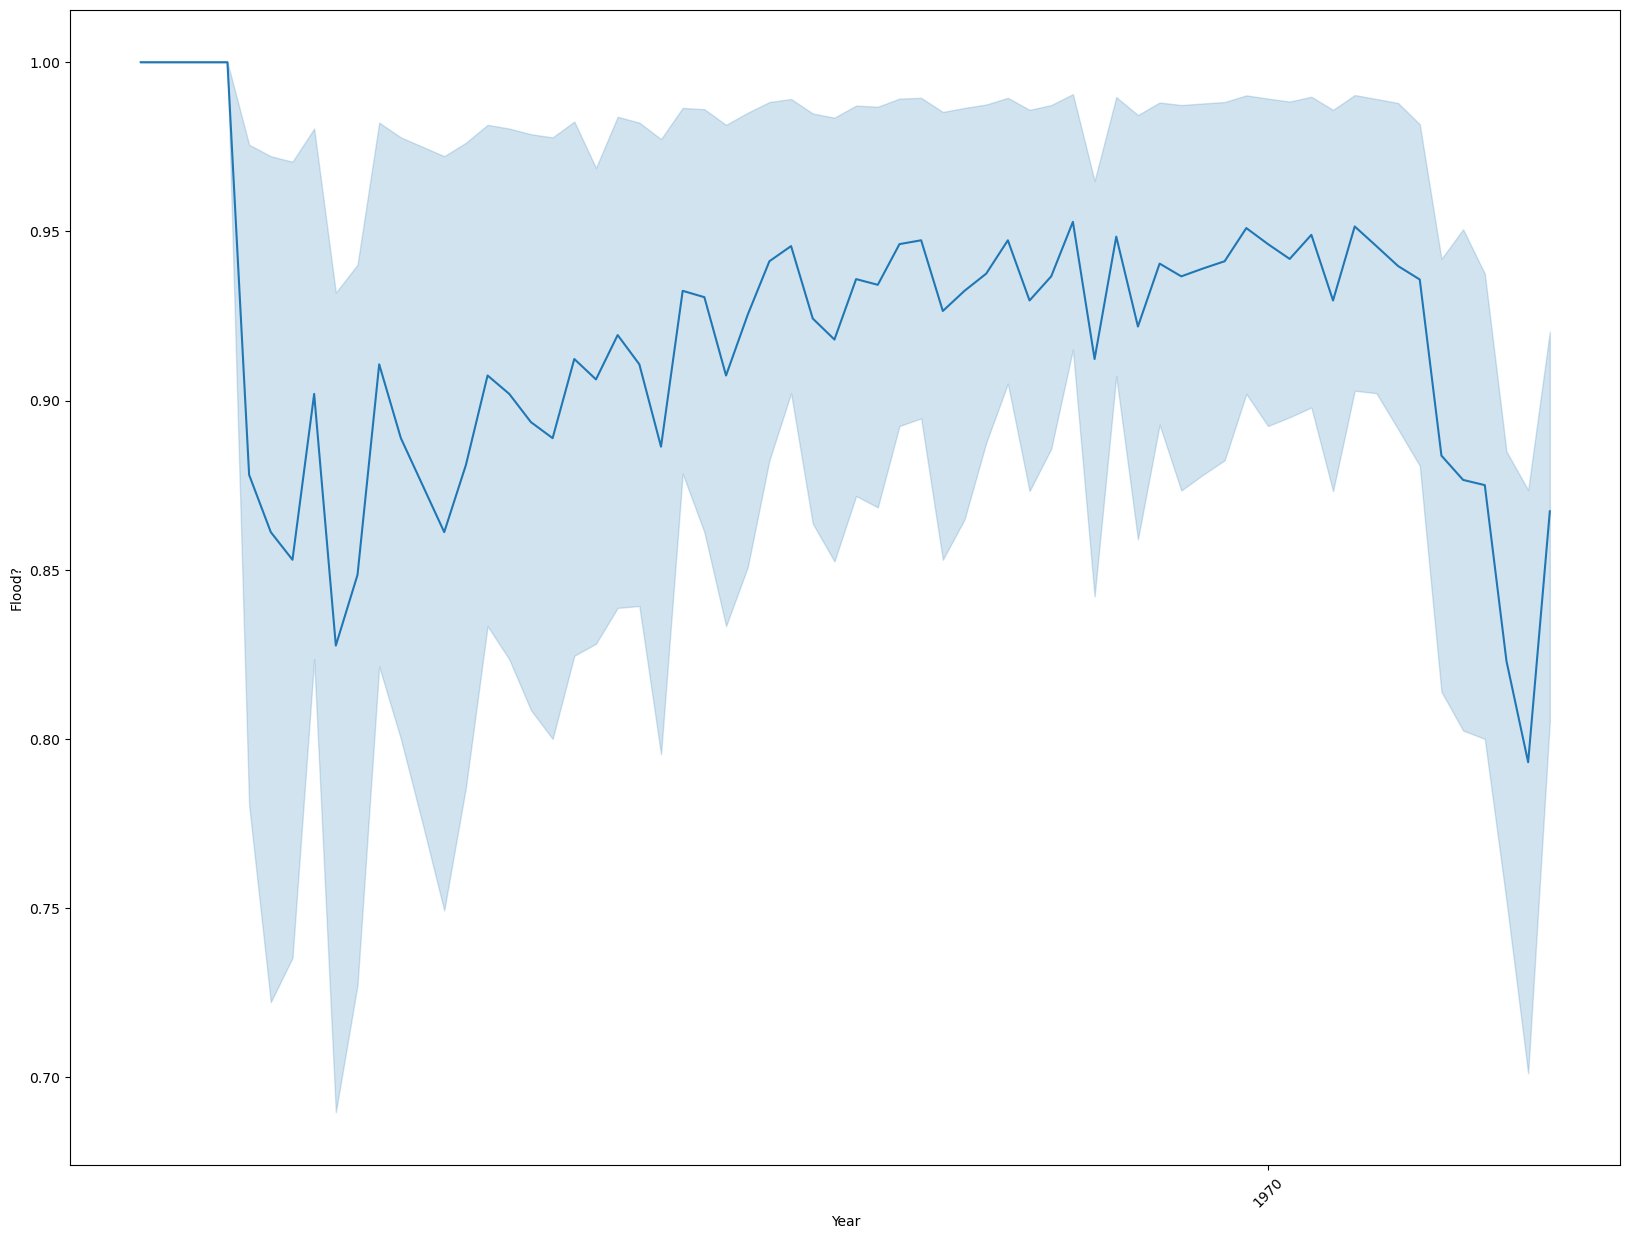

In [961]:
plt.figure(figsize = (20,15))
sb.lineplot(x = 'Year', y = 'Flood?', data = df)
plt.xticks(rotation=45)
plt.show()

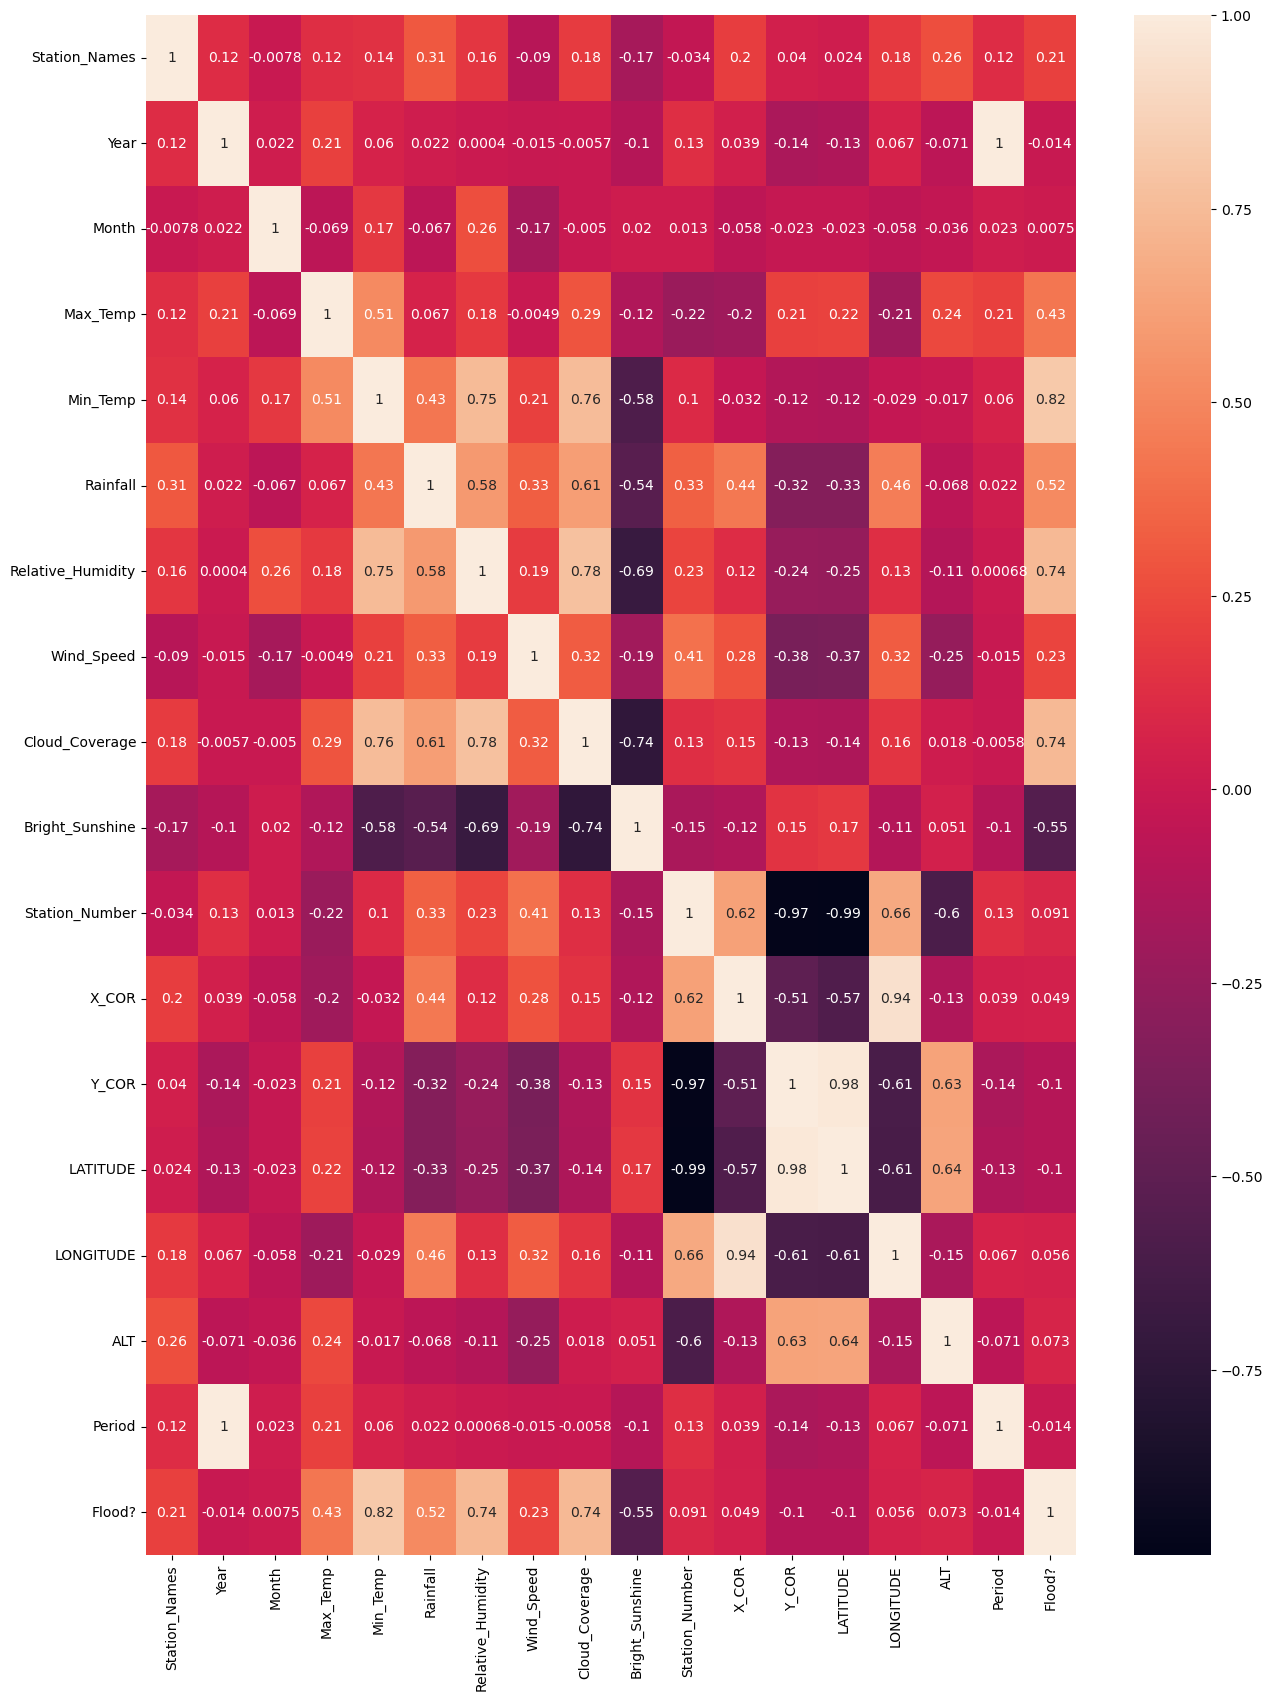

In [963]:
#cking at the correlations between the features in the data
plt.figure(figsize = (15,20))
sb.heatmap(df.corr(), annot = True)
plt.show()

In [966]:
#dropping irrelevant data
df.drop(columns= ['X_COR','Y_COR','Year',], inplace =True)

In [968]:
df1 = df.copy()

In [970]:
df1.tail(10)

,Station_Names,Month,Max_Temp,Min_Temp,Rainfall,Relative_Humidity,Wind_Speed,Cloud_Coverage,Bright_Sunshine,Station_Number,LATITUDE,LONGITUDE,ALT,Period,Flood?
4483,32,1970-01-01 00:00:00.000000009,32.2,25.2,826.0,90.0,1.9,6.7,3.4,41998,20.87,92.26,4,2011.09,1.0
4484,32,1970-01-01 00:00:00.000000010,34.1,24.3,474.0,86.0,1.6,4.4,8.0,41998,20.87,92.26,4,2011.10,1.0
4485,32,1970-01-01 00:00:00.000000006,34.1,25.7,1431.0,89.0,2.3,6.6,3.1,41998,20.87,92.26,4,2012.06,1.0
4486,32,1970-01-01 00:00:00.000000007,31.5,25.3,1349.0,93.0,2.2,7.3,2.6,41998,20.87,92.26,4,2012.07,1.0
4487,32,1970-01-01 00:00:00.000000008,32.3,25.5,933.0,90.0,1.8,6.2,4.3,41998,20.87,92.26,4,2012.08,1.0
4488,32,1970-01-01 00:00:00.000000009,33.1,25.7,496.0,87.0,2.0,5.7,5.9,41998,20.87,92.26,4,2012.09,1.0
4489,32,1970-01-01 00:00:00.000000005,34.2,24.8,753.0,85.0,3.7,5.5,3.9,41998,20.87,92.26,4,2013.05,1.0
4490,32,1970-01-01 00:00:00.000000006,33.2,25.8,821.0,87.0,3.5,6.2,4.6,41998,20.87,92.26,4,2013.06,1.0
4491,32,1970-01-01 00:00:00.000000007,32.2,25.3,1127.0,89.0,3.3,6.5,3.6,41998,20.87,92.26,4,2013.07,1.0
4492,32,1970-01-01 00:00:00.000000008,32.5,25.4,851.0,88.0,2.5,6.2,3.8,41998,20.87,92.26,4,2013.08,1.0


In [972]:
# Convert the Timestamp to numerical values (e.g., days since the first date)
#df['Year'] = (df['Year'] - df['Year'].min()).dt.Years
#df['Month'] = (df['Month'] - df['Month'].min()).dt.Months

#df['Year'] = (df['Year'] - df['Year'].min()) / pd.Timedelta(days=365.25)  # Approximate years
#df['Month'] = (df['Month'] - df['Month'].min()) / pd.Timedelta(days=30.44)  # Approximate months


In [977]:
df1.columns

Index(['Station_Names', 'Month', 'Max_Temp', 'Min_Temp', 'Rainfall',
       'Relative_Humidity', 'Wind_Speed', 'Cloud_Coverage', 'Bright_Sunshine',
       'Station_Number', 'LATITUDE', 'LONGITUDE', 'ALT', 'Period', 'Flood?'],
      dtype='object')

In [979]:
df_nmc = df1[['Max_Temp', 'Min_Temp', 'Rainfall','Relative_Humidity', 'Wind_Speed', 'Cloud_Coverage', 'Bright_Sunshine','LATITUDE', 'LONGITUDE', 'ALT', 'Period','Flood?']]

In [981]:
df_nmc

,Max_Temp,Min_Temp,Rainfall,Relative_Humidity,Wind_Speed,Cloud_Coverage,Bright_Sunshine,LATITUDE,LONGITUDE,ALT,Period,Flood?
0,34.4,25.7,512.0,80.0,1.631481,5.6,4.072340,22.70,90.36,4,1949.06,1.0
1,33.4,25.8,575.0,85.0,1.570370,5.4,3.738298,22.70,90.36,4,1949.07,1.0
2,33.5,25.7,349.0,86.0,1.329630,5.6,4.272340,22.70,90.36,4,1949.08,1.0
3,36.1,25.5,87.0,78.0,1.703704,4.8,7.046809,22.70,90.36,4,1950.05,1.0
4,33.9,26.0,476.0,87.0,1.631481,7.2,4.072340,22.70,90.36,4,1950.06,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4488,33.1,25.7,496.0,87.0,2.000000,5.7,5.900000,20.87,92.26,4,2012.09,1.0
4489,34.2,24.8,753.0,85.0,3.700000,5.5,3.900000,20.87,92.26,4,2013.05,1.0
4490,33.2,25.8,821.0,87.0,3.500000,6.2,4.600000,20.87,92.26,4,2013.06,1.0
4491,32.2,25.3,1127.0,89.0,3.300000,6.5,3.600000,20.87,92.26,4,2013.07,1.0


In [985]:
#sergregetting the data to x and y befor normalizing
dfArr= df_nmc.values
X = dfArr[:,:-1]
y = dfArr[:,-1]


In [987]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
normDF_stnd = scaler.fit_transform(X)

In [989]:
#Normalizing the data
from sklearn.preprocessing import Normalizer
scaler = Normalizer().fit(X)
normDF = scaler.transform(X)
normDF

array([[0.01703478, 0.01272656, 0.25354087, ..., 0.044746  , 0.00198079,
        0.96516868],
       [0.01640086, 0.01266892, 0.28235007, ..., 0.0443707 , 0.00196417,
        0.95707835],
       [0.01687997, 0.01294971, 0.17585401, ..., 0.04553057, 0.00201552,
        0.98210181],
       ...,
       [0.01524151, 0.01184431, 0.37690605, ..., 0.04235488, 0.00183633,
        0.92415896],
       [0.01393273, 0.01094714, 0.48764547, ..., 0.03992029, 0.00173077,
        0.87104213],
       [0.01484164, 0.01159931, 0.38862256, ..., 0.04213198, 0.00182666,
        0.9193047 ]])

In [991]:
X

array([[  34.4 ,   25.7 ,  512.  , ...,   90.36,    4.  , 1949.06],
       [  33.4 ,   25.8 ,  575.  , ...,   90.36,    4.  , 1949.07],
       [  33.5 ,   25.7 ,  349.  , ...,   90.36,    4.  , 1949.08],
       ...,
       [  33.2 ,   25.8 ,  821.  , ...,   92.26,    4.  , 2013.06],
       [  32.2 ,   25.3 , 1127.  , ...,   92.26,    4.  , 2013.07],
       [  32.5 ,   25.4 ,  851.  , ...,   92.26,    4.  , 2013.08]])

In [993]:
normDF_stnd = pd.DataFrame(X, columns = list(df_nmc)[:-1])
normDF_stnd

,Max_Temp,Min_Temp,Rainfall,Relative_Humidity,Wind_Speed,Cloud_Coverage,Bright_Sunshine,LATITUDE,LONGITUDE,ALT,Period
0,34.4,25.7,512.0,80.0,1.631481,5.6,4.072340,22.70,90.36,4.0,1949.06
1,33.4,25.8,575.0,85.0,1.570370,5.4,3.738298,22.70,90.36,4.0,1949.07
2,33.5,25.7,349.0,86.0,1.329630,5.6,4.272340,22.70,90.36,4.0,1949.08
3,36.1,25.5,87.0,78.0,1.703704,4.8,7.046809,22.70,90.36,4.0,1950.05
4,33.9,26.0,476.0,87.0,1.631481,7.2,4.072340,22.70,90.36,4.0,1950.06
...,...,...,...,...,...,...,...,...,...,...,...
4488,33.1,25.7,496.0,87.0,2.000000,5.7,5.900000,20.87,92.26,4.0,2012.09
4489,34.2,24.8,753.0,85.0,3.700000,5.5,3.900000,20.87,92.26,4.0,2013.05
4490,33.2,25.8,821.0,87.0,3.500000,6.2,4.600000,20.87,92.26,4.0,2013.06
4491,32.2,25.3,1127.0,89.0,3.300000,6.5,3.600000,20.87,92.26,4.0,2013.07


In [995]:
normDF_stnd.describe().T

,count,mean,std,min,25%,50%,75%,max
Max_Temp,4493.0,34.017633,1.830043,26.00,33.00,34.000000,35.100000,43.70
Min_Temp,4493.0,24.589457,2.662917,8.50,24.60,25.400000,25.800000,27.70
Rainfall,4493.0,526.001857,271.375965,0.00,385.00,494.000000,661.000000,2072.00
Relative_Humidity,4493.0,85.363425,5.299593,52.00,84.00,87.000000,88.000000,96.00
Wind_Speed,4493.0,1.792189,1.118093,0.00,1.00,1.544444,2.300000,7.80
Cloud_Coverage,4493.0,5.554604,1.436558,0.00,5.20,6.000000,6.434483,7.90
Bright_Sunshine,4493.0,4.736064,1.461535,0.70,3.80,4.435849,5.400000,10.70
LATITUDE,4493.0,23.237650,1.244211,20.87,22.36,22.830000,24.120000,25.72
LONGITUDE,4493.0,90.655568,1.118019,88.56,89.84,90.670000,91.730000,92.26
ALT,4493.0,13.391720,14.118934,0.00,4.00,6.000000,19.000000,63.00


In [1000]:
#addig back the outcome variable in the data
normDF_stnd['Flood?'] = df1['Flood?']

In [1002]:
#checking at the distribution of the output variable
normDF_stnd['Flood?'].value_counts()

Flood?
1.0    4132
0.0     361
Name: count, dtype: int64

In [1004]:
normDFArr1 = normDF_stnd.values
X1 = normDFArr1[:,0:-1]
y1 = normDFArr1[:,-1]

In [1006]:
#Recosive feature elimination
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
n_features = 8
rfe = RFE(model, n_features_to_select = n_features)
fit = rfe.fit(X1,y1)

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

In [1008]:
#exploring the ranking by RFE
rfe.ranking_

array([1, 1, 3, 1, 1, 1, 1, 1, 2, 1, 4])

In [1010]:
#Extracting the selected features into a dataframe

valIdx = []
colNames = []
cols = list(normDF_stnd.columns)
n =0
for val, colName in zip(list(fit.support_), cols):
    
    #print(type(val))
    if val == True:
        valIdx.append(n)
        colNames.append(colName)
        n+=1
    else:
        n+=1
        
print(valIdx)

[0, 1, 3, 4, 5, 6, 7, 9]


In [1012]:
print(colNames)

['Max_Temp', 'Min_Temp', 'Relative_Humidity', 'Wind_Speed', 'Cloud_Coverage', 'Bright_Sunshine', 'LATITUDE', 'ALT']


In [1014]:
#Final_normDF.columns
#Final_normDF = pd.DataFrame(X, columns = list(df1)[1:-1])
#Final_normDF

In [1016]:
Final_normDF

,Year,Month,Max_Temp,Min_Temp,Rainfall,Relative_Humidity,Wind_Speed,Cloud_Coverage,Bright_Sunshine,X_COR,Y_COR,LATITUDE,LONGITUDE,ALT,Period
0,1949.0,6.0,34.4,25.7,512.0,80.0,1.631481,5.6,4.072340,536809.8,510151.9,22.70,90.36,4.0,1949.06
1,1949.0,7.0,33.4,25.8,575.0,85.0,1.570370,5.4,3.738298,536809.8,510151.9,22.70,90.36,4.0,1949.07
2,1949.0,8.0,33.5,25.7,349.0,86.0,1.329630,5.6,4.272340,536809.8,510151.9,22.70,90.36,4.0,1949.08
3,1950.0,5.0,36.1,25.5,87.0,78.0,1.703704,4.8,7.046809,536809.8,510151.9,22.70,90.36,4.0,1950.05
4,1950.0,6.0,33.9,26.0,476.0,87.0,1.631481,7.2,4.072340,536809.8,510151.9,22.70,90.36,4.0,1950.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4488,2012.0,9.0,33.1,25.7,496.0,87.0,2.000000,5.7,5.900000,734765.4,308914.1,20.87,92.26,4.0,2012.09
4489,2013.0,5.0,34.2,24.8,753.0,85.0,3.700000,5.5,3.900000,734765.4,308914.1,20.87,92.26,4.0,2013.05
4490,2013.0,6.0,33.2,25.8,821.0,87.0,3.500000,6.2,4.600000,734765.4,308914.1,20.87,92.26,4.0,2013.06
4491,2013.0,7.0,32.2,25.3,1127.0,89.0,3.300000,6.5,3.600000,734765.4,308914.1,20.87,92.26,4.0,2013.07


In [1018]:
#Sorting out the final selected features for modelling
#Final_normDF = normDF[['Year','Month','Max_Temp','Rainfall','Relative_Humidity','Wind_Speed','Cloud_Coverage','Y_COR','LONGITUDE']]
Final_nselect= Final_normDF[['Max_Temp', 'Min_Temp', 'Relative_Humidity', 'Wind_Speed', 'Cloud_Coverage', 'Bright_Sunshine', 'LATITUDE', 'ALT']]
Final_nselect

,Max_Temp,Min_Temp,Relative_Humidity,Wind_Speed,Cloud_Coverage,Bright_Sunshine,LATITUDE,ALT
0,34.4,25.7,80.0,1.631481,5.6,4.072340,22.70,4.0
1,33.4,25.8,85.0,1.570370,5.4,3.738298,22.70,4.0
2,33.5,25.7,86.0,1.329630,5.6,4.272340,22.70,4.0
3,36.1,25.5,78.0,1.703704,4.8,7.046809,22.70,4.0
4,33.9,26.0,87.0,1.631481,7.2,4.072340,22.70,4.0
...,...,...,...,...,...,...,...,...
4488,33.1,25.7,87.0,2.000000,5.7,5.900000,20.87,4.0
4489,34.2,24.8,85.0,3.700000,5.5,3.900000,20.87,4.0
4490,33.2,25.8,87.0,3.500000,6.2,4.600000,20.87,4.0
4491,32.2,25.3,89.0,3.300000,6.5,3.600000,20.87,4.0


In [1020]:
#Adding back the target variable flood
Final_nselect['Flood?'] = df1['Flood?']

C:\Users\DELL\AppData\Local\Temp\ipykernel_6756\1733182911.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Final_nselect['Flood?'] = df1['Flood?']


In [1022]:
Final_nselect

,Max_Temp,Min_Temp,Relative_Humidity,Wind_Speed,Cloud_Coverage,Bright_Sunshine,LATITUDE,ALT,Flood?
0,34.4,25.7,80.0,1.631481,5.6,4.072340,22.70,4.0,1.0
1,33.4,25.8,85.0,1.570370,5.4,3.738298,22.70,4.0,1.0
2,33.5,25.7,86.0,1.329630,5.6,4.272340,22.70,4.0,1.0
3,36.1,25.5,78.0,1.703704,4.8,7.046809,22.70,4.0,1.0
4,33.9,26.0,87.0,1.631481,7.2,4.072340,22.70,4.0,1.0
...,...,...,...,...,...,...,...,...,...
4488,33.1,25.7,87.0,2.000000,5.7,5.900000,20.87,4.0,1.0
4489,34.2,24.8,85.0,3.700000,5.5,3.900000,20.87,4.0,1.0
4490,33.2,25.8,87.0,3.500000,6.2,4.600000,20.87,4.0,1.0
4491,32.2,25.3,89.0,3.300000,6.5,3.600000,20.87,4.0,1.0


In [1024]:
Final_nselect['Flood?'].value_counts()

Flood?
1.0    4132
0.0     361
Name: count, dtype: int64

In [1026]:
Final_normDFArr = Final_nselect.values
X = Final_normDFArr[:,:-1]
y = Final_normDFArr[:,-1]

In [1028]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
seed_reach = [0,2,4,6,8,12]
for seed in seed_reach:
    
    train_X, test_X, strain_y, test_y = train_test_split(X,y, test_size = 0.2, random_state = seed )
    model.fit(train_X,strain_y)
    y_predict = model.predict(test_X)
    print(seed, ":", model.score(test_X,test_y) )
    joblib.dump(model, 'model/flood_prediction.pkl')

0 : 0.9844271412680756
2 : 0.9866518353726362
4 : 0.9899888765294772
6 : 0.9833147942157954
8 : 0.9888765294771968
12 : 0.985539488320356


In [1030]:
Final_nselect.columns

Index(['Max_Temp', 'Min_Temp', 'Relative_Humidity', 'Wind_Speed',
       'Cloud_Coverage', 'Bright_Sunshine', 'LATITUDE', 'ALT', 'Flood?'],
      dtype='object')

In [824]:
# Function to predict using trained model on unseen data

def predFunc(Month,Max_Temp,Min_Temp,Relative_Humidity,Wind_Speed,Cloud_Coverage,Bright_Sunshine,LATITUDE,ALT):
    inputData = pd.DataFrame([['Max_Temp', 'Min_Temp', 'Relative_Humidity', 'Wind_Speed', 'Cloud_Coverage', 'Bright_Sunshine', 'LATITUDE', 'ALT']], columns=list(df1.columns)[:-1])
    inputData = scaler.transform(inputData)
    flood = model.predict(inputData)[0]
    return flood

inputSamples = [list(x) for x in list(X_test[0:10,:])]     
    
interface=gr.Interface(
    fn = predFunc,
    inputs=[
        #gr.Number(label='Month'),
        gr.Number(label='Max_Temp'),
        gr.Number(label='Min_Temp'),
        gr.Number(label='Relative_Humidity'),
        gr.Number(label='Wind_Speed'),
        gr.Number(label='Cloud_Coverage'),
        gr.Number(label='Bright_Sunshine'),
        gr.Number(label='LATITUDE'),
        gr.Number(label='ALT'),
        
    
    ],
    outputs= gr.Textbox(label='Predicted flood'),
    examples = inputSamples,
    #live=True
    

)
interface.launch(share=True)

C:\Users\DELL\anaconda3\Lib\site-packages\gradio\utils.py:986: UserWarning: Expected 9 arguments for function <function predFunc at 0x0000025B4F9D67A0>, received 8.
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\gradio\utils.py:990: UserWarning: Expected at least 9 arguments for function <function predFunc at 0x0000025B4F9D67A0>, received 8.
  warnings.warn(


Running on local URL:  http://127.0.0.1:7871


C:\Users\DELL\anaconda3\Lib\site-packages\gradio\analytics.py:106: UserWarning: IMPORTANT: You are using gradio version 4.40.0, however version 4.44.1 is available, please upgrade. 
--------
  warnings.warn(


Running on public URL: https://dbc001fbc1f4c9a2a3.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


In [201]:
model.predict(test_X)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [203]:
test_y

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [205]:
Final_normDFArr = df1.values
X2 = Final_normDFArr[:,1:-1]
y2 = Final_normDFArr[:,-1]

In [ ]:
'''from sklearn.preprocessing import MinMaxScaler
from numpy import set_printoptions
scaler = MinMaxScaler(feature_range =(0,1))
df_S = scaler.fit_tranform(X2)
set_printoptions (precision = 3)'''


In [207]:
#modeling with  ridg regresssion
from sklearn.linear_model import Ridge
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
#train the data
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

rid_model = Ridge(alpha=1.0)
#train model
rid_model.fit(X_train,y_train)

#predict y
ypred_ridg = rid_model.predict(X_test)

In [209]:
ypred_ridg

array([ 0.81623572,  0.90534266,  0.96017386,  1.10041201,  0.91262077,
        0.89329718,  1.07233119,  0.95474348,  0.97597027,  0.95402681,
        1.02610342,  0.23211178,  0.87969632,  0.87367339,  0.99280527,
        0.99606422,  1.10560356,  0.92530951,  1.06761222,  0.16365171,
        0.97216309,  1.08570072,  0.92332767,  0.26119274,  0.81900265,
        0.32595304,  0.92285908,  1.11873951,  0.75672716,  0.91453853,
        0.9906876 ,  0.99912489,  0.80551737,  1.14460394,  1.08317681,
        0.94386722,  0.86501549,  1.07178906,  0.98458298,  1.13449194,
        1.01292893,  1.05265967,  1.04159618,  0.92026866,  0.82318859,
        1.07027045,  0.77274162,  0.99436852,  1.10239062,  1.08605283,
        0.63506775,  0.86796308,  1.17710517,  0.58156592,  0.91581668,
        0.97057111,  0.92970709,  0.92428069,  1.05159004,  1.1436822 ,
        1.08457259,  0.96407434,  1.09917477,  0.90695564,  1.07674275,
        0.87407302,  0.64835555,  1.00757792,  0.88506741,  1.11

In [215]:
 #model evaluation with absolite mean error
amse = mean_squared_error(y_test, ypred_ridg) 
amse

0.022770609849481913

In [217]:
#model evaluation with rootsuared mean error
rmse = mean_squared_error(y_test, ypred_ridg, squared = False)# we dont want the variance to be squared
rmse

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


0.1508993368092846

In [ ]:
from sklearn.model_selection import train_test_split
X2_train,X2_test,y2_train,y2_test = train_test_split(X2,y2, test_size = 0.2, random_seach = seed)

In [ ]:
from sklearn.svm import SVC
from metrics import accuracy_score
sees_search = [0,2,4,6,8,12]
for seedsvm in sees_search:
    svm_classifier = SVC(kernel= 'linear', random_state = sees_search)
    svm_classifier.fit()
    